In [6]:
from heron import data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.s

In [2]:
concrete = np.genfromtxt("../data/concrete.csv", delimiter=" ,")

In [3]:
concrete = data.Data(concrete[:, :-1], concrete[:,-1],              
                     target_names = ["Cement", "Slag", "Fly Ash", "Water", "Superplasticiser", "Coarse Agg", "Fine Ag", "Age"],
                      label_names = ["Strength"]   )

In [4]:
from heron import corner

/home/daniel/.virtualenvs/heron/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/daniel/.virtualenvs/heron/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


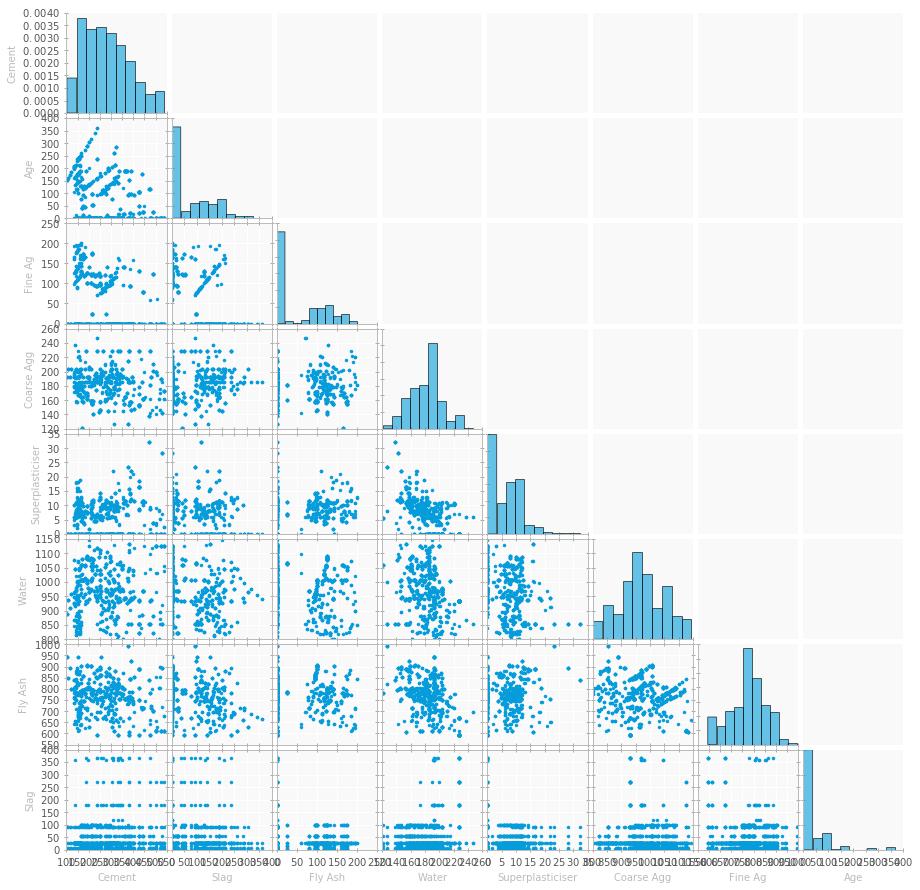

In [7]:
corner.corner(concrete, figsize=(15,15))

In [8]:
from heron import regression
from heron import kernels

In [9]:
gp = regression.Regressor(concrete, kernel=kernels.SquaredExponential(ndim=8))

In [10]:
new_point = np.atleast_2d([0.1]*8)

In [11]:
new_point = np.atleast_2d(gp.training_data[1])
new_point[0,1]+=0.1

In [12]:
gp.prediction(new_point)

(array([ 22.50255699]), array([[-5915.86957992]]))

In [13]:
gp.set_hyperparameters([.1]*9)

-4873193.3506383933

In [14]:
gp.grad_loglikelihood()

/home/daniel/.virtualenvs/heron/lib/python2.7/site-packages/heron-0.1.0-py2.7.egg/heron/kernels.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


array([  8.38853822e+11,   4.35693033e+09,   6.03307297e+08,
         2.05486689e+08,   1.67113775e+09,   3.47139647e+09,
         3.81652237e+08,   2.89236724e+09,   3.78093762e+10])

In [15]:
from scipy.optimize import minimize

In [16]:
def nll(p):
    gp.set_hyperparameters(p)
    ll = gp.loglikelihood()
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_hyperparameters(p)
    return -gp.grad_loglikelihood()

In [40]:
x0 = [1]*9
res = minimize(nll, x0, method='BFGS', jac=grad_nll ,options={'disp': True})

         Current function value: 92272.901495
         Iterations: 3
         Function evaluations: 62
         Gradient evaluations: 51


In [41]:
gp.kernel.hyper

[-104.58084529222131,
 [array([ 121.9640948 ,  137.49055018,  195.37605426,  -96.72848378,
         -220.48059748,  -52.0571154 , -145.76064287,  184.51591923])]]

In [75]:
new_point = np.atleast_2d(gp.training_data[1])
new_point = np.tile(new_point, (100,1))
new_point[:,1] = np.linspace(0, 1, 100)

In [76]:
new_point.shape

(100, 8)

In [77]:
pred = gp.prediction(new_point)

In [ ]:
i=1
new_point = np.atleast_2d(gp.training_data[1])
new_point = np.tile(new_point, (100,1))
new_point[:,i] = np.linspace(0, 1, 100)
plt.plot(np.linspace(0,1,100), pred[0])
plt.xlabel(gp.training_object.target_names[i])
plt.fill_between(np.linspace(0,1,100), pred[0]+np.diag(pred[1]), pred[0]-np.diag(pred[1]), alpha=0.4)

In [59]:
gp.set_hyperparameters([5]*9)
gp.loglikelihood()

-89941.00265879347

In [29]:
import emcee

In [30]:
ndim = 9
burn = 10
nwalkers = 100
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

In [32]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, gp.set_hyperparameters, args=[])
# Run the burn-in
pos, prob, state = sampler.run_mcmc(p0, burn)

In [18]:
def nll(p):
    gp.set_hyperparameters(p)
    ll = gp.loglikelihood()
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_hyperparameters(p)
    return -gp.grad_lnlikelihood(y, quiet=True)

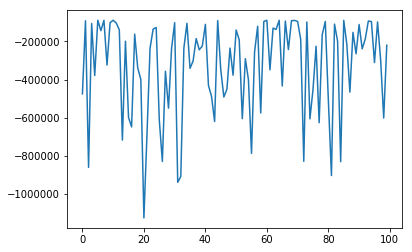

In [37]:
plt.plot(prob)

In [38]:
gp.loglikelihood()

-219719.59704498551

In [39]:
pos[-1]

array([ 0.49244046,  2.73157503,  0.58098634,  0.52088189, -3.03855323,
        2.96034444,  1.05788286, -0.11021227,  2.89234684])

In [40]:
np.exp(0)

1.0